This notebook contains the results for the complete dataset from Austin for the year 2014.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [4]:
import pickle

### Loading all the prediction files

In [5]:
knn_p= pickle.load(open("predictions/knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/o_mf.pkl",'r'))['mf']
tensor_all_p = pickle.load(open("predictions/o_tf_all_appliances.pkl",'r'))['tf_all_appliances']
tensor_all_static_p = pickle.load(open("predictions/o_tf_all_appliances_static_weather.pkl",'r'))['tf_all_appliances_static_weather']
mf_all_p = pickle.load(open("predictions/o_mf_all_appliances.pkl",'r'))['mf_all_appliances']


### KNN prediction and Sensitivity analysis

In [6]:
sanity_num_points = {}

In [7]:
knn= {}
sensitivity_knn={}
sanity_num_points = {}
for appliance in knn_p.keys()[:]:
    print(appliance)
    knn[appliance] = {}
    sensitivity_knn[appliance]={}
    sanity_num_points[appliance]={}
    for feature in ['energy', 'energy_static']:
        sanity_num_points[appliance][feature]={}
        sensitivity_knn[appliance][feature]={}
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            pred_fraction, gt_fraction, error, e = compute_rmse_fraction(appliance,pred)
            assert(len(pred_fraction)==len(gt_fraction))
            sanity_num_points[appliance][feature][n]=len(pred_fraction)
            sensitivity_knn[appliance][feature][n] = error
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac
wm
fridge
mw
oven
dw


In [9]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,1.892887,4.980033,41.003352,1.975996,2.010145,2.093979
energy_static,1.856814,4.943843,33.872439,1.971375,2.074454,2.068189


In [10]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3410.0,3742.0,2354.0,2429.0,1200.0,2451.0
energy_static,3412.0,3744.0,2358.0,2430.0,1200.0,2452.0


In [11]:
%matplotlib inline

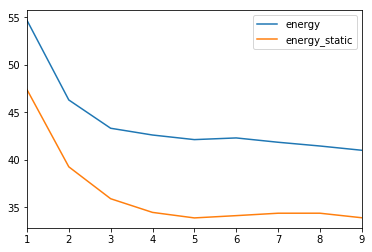

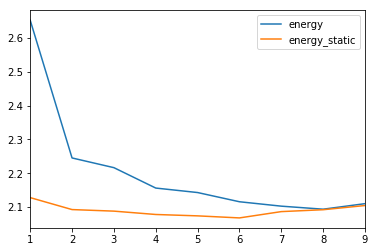

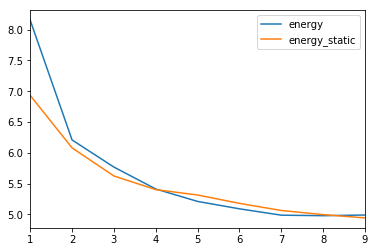

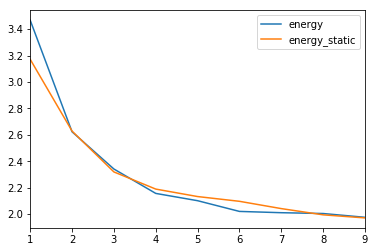

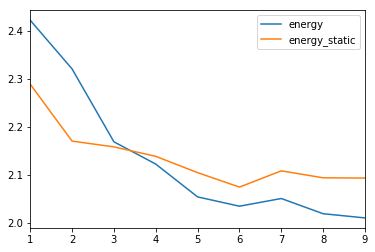

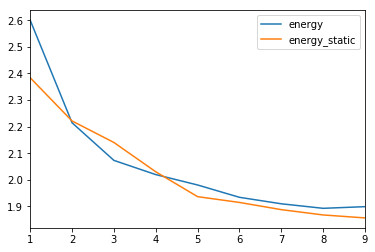

In [12]:
sensitivity = sensitivity_knn
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity_knn[appliance])
    appliance_df.plot()
    

### TF-1-at-a-time

In [13]:
sanity_num_points ={}
dataset = 'False'
cost = 'abs'
tf_custom= {}
sensitivity = {}
for appliance in tensor_custom_p.keys()[:]:
    print appliance
    sanity_num_points[appliance] = {}
    sensitivity[appliance] = {}
    tf_custom[appliance]= {}
    for case in [str(x) for x in range(1, 5)]:
        sanity_num_points[appliance][case]={}
        sensitivity[appliance][case] = {}
        best_error = 1e6
        for a in [str(x) for x in range(1, 10)]:
            alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_p[appliance][case][a][cost][dataset])
            assert(len(alpha)==len(beta))
            sanity_num_points[appliance][case][a]=len(alpha)
            sensitivity[appliance][case][a] = error
            if error < best_error:
                best_error = error
                tf_custom[appliance][case] = best_error

hvac
wm
fridge
mw
oven
dw


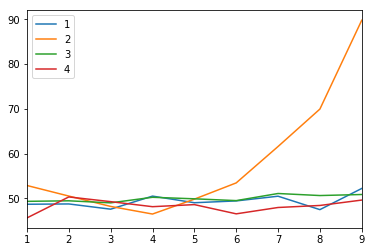

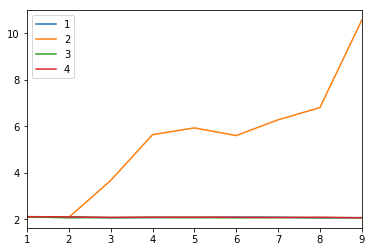

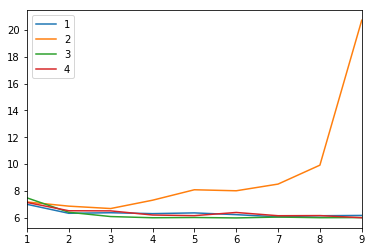

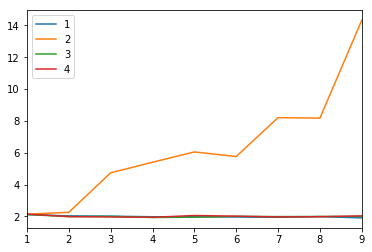

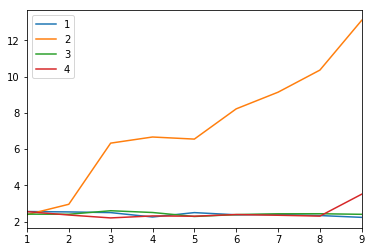

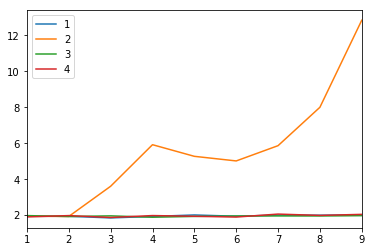

In [14]:
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot()

In [15]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
1,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
2,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
3,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
4,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


### TF-all-appliances

In [ ]:
dataset = 'False'
tf_custom_all= {}
cost='abs'
sanity_num_points ={}
sensitivity ={}

for appliance in tensor_custom_p.keys()[:]:
    print appliance
    sensitivity[appliance] = {}
    tf_custom_all[appliance]= {}
    sanity_num_points[appliance]={}
    for case in [str(x) for x in range(1, 5)]:
        sensitivity[appliance][case] = {}
        
        sanity_num_points[appliance][case]={}
        best_error = 1e6
        for a in [str(x) for x in range(1, 11)]:
            try:
                pred = tensor_all_p[appliance][case][a][cost]
                
                if len(pred)<500:
                    continue
                if appliance=='hvac':
                    pred = pred[range(4, 10)]
                alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
                assert(len(alpha)==len(beta))
                sanity_num_points[appliance][case][a]=len(alpha)
                sensitivity[appliance][case][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_all[appliance][case] = best_error
            except Exception, e:
                print a, appliance, e

hvac
wm
fridge
mw
oven
dw


In [17]:
pd.DataFrame(tf_custom_all)

,aggregate,dw,fridge,hvac,mw,oven,wm
1,18.535797,1.533341,6.949323,21.445088,2.168952,2.077314,2.065229
2,34.085106,1.544899,6.545914,20.201471,2.145021,2.158957,2.065386
3,9.488244,1.611922,6.465205,20.850189,2.133791,2.182970,2.077530
4,19.330718,1.536955,6.035927,19.211247,2.058452,2.112928,2.054236


In [18]:
pd.Panel(sanity_num_points).mean()

,aggregate,dw,fridge,hvac,mw,oven,wm
1,10848.0,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
2,10848.0,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
3,10848.0,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
4,10848.0,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


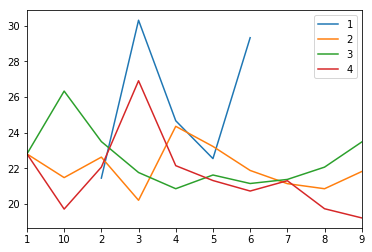

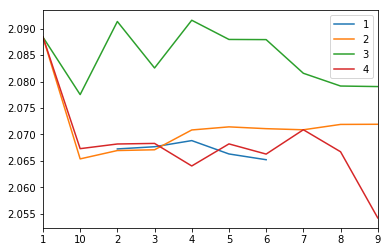

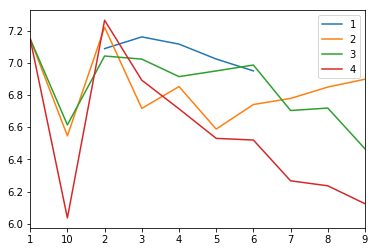

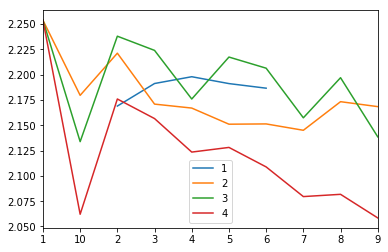

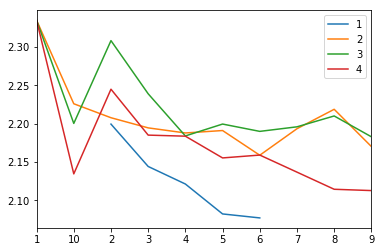

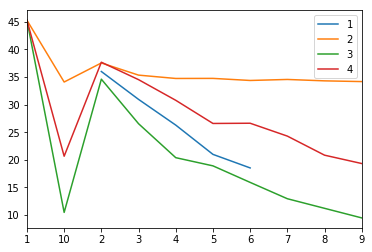

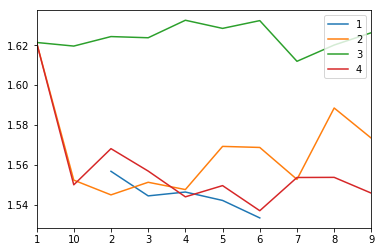

In [19]:
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot()

### TF-1-at-time with static and weather

In [20]:
dataset = 'False'
tf_custom_static_weather= {}
cost= 'abs'
sanity_num_points = {}
sensitivity = {}
for appliance in tensor_custom_static_weather_p.keys()[:]:
    print appliance
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    tf_custom_static_weather[appliance]= {}
    for static in ['None','static']:
        tf_custom_static_weather[appliance][static] = {}
        for weather in ['None','weather']:
            tf_custom_static_weather[appliance][static][weather] = {}
            sanity_num_points[appliance][(static, weather)] = {}

            best_error = 1e6
            sensitivity[appliance][(static, weather)] = {}
            for a in [str(x) for x in range(1, 10)]:
                alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost])
                assert(len(alpha)==len(beta))
                sanity_num_points[appliance][(static, weather)][a]=len(alpha)
                sensitivity[appliance][(static, weather)][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_static_weather[appliance][static][weather] = best_error

hvac
wm
fridge
mw
oven
dw


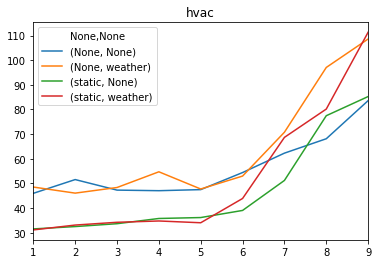

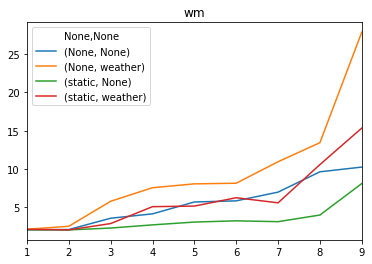

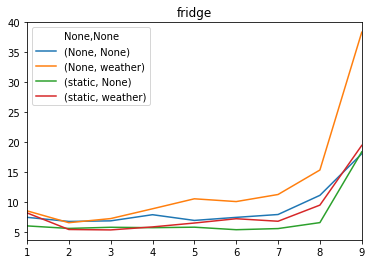

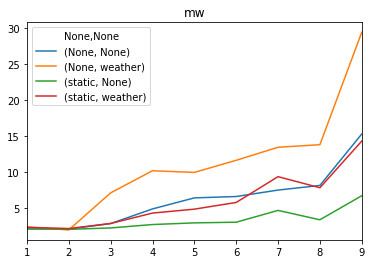

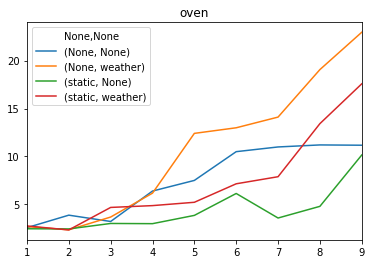

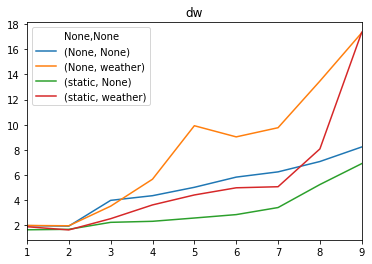

In [21]:
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance)

# Added by Yiling Start

## TF-all-appliance with static and weather

In [80]:
dataset = 'False'
tf_custom_static_weather_all= {}
cost= 'abs'
sanity_num_points = {}
sensitivity = {}
for appliance in tensor_custom_static_weather_p.keys()[:]:
    print appliance
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    tf_custom_static_weather_all[appliance]= {}
    for static in ['None','static']:
        tf_custom_static_weather_all[appliance][static] = {}
        for weather in ['None','weather']:
            tf_custom_static_weather_all[appliance][static][weather] = {}
            sanity_num_points[appliance][(static, weather)] = {}

            best_error = 1e6
            sensitivity[appliance][(static, weather)] = {}
            for a in [str(x) for x in range(1, 13)]:
                pred = tensor_all_static_p[appliance][static][weather][a]
                
                if len(pred) < 500:
                    continue
                if appliance == 'hvac':
                    pred = pred[range(4, 10)]
                alpha, beta, error, e = compute_rmse_fraction(appliance, pred)
                assert(len(alpha) == len(beta))
                sanity_num_points[appliance][(static, weather)][a] = len(alpha)
                sensitivity[appliance][(static, weather)][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_static_weather_all[appliance][static][weather] = best_error

hvac
wm
fridge
mw
oven
dw


In [81]:
pd.DataFrame(tf_custom_static_weather_all)

,dw,fridge,hvac,mw,oven,wm
None,"{u'None': 1.54363711667, u'weather': 1.5535909...","{u'None': 6.38416993795, u'weather': 6.3974083...","{u'None': 19.6366083239, u'weather': 19.810035...","{u'None': 2.11159037645, u'weather': 2.1115340...","{u'None': 2.17707508288, u'weather': 2.1501562...","{u'None': 2.05997093002, u'weather': 2.0585958..."
static,"{u'None': 1.53639976504, u'weather': 1.5386156...","{u'None': 6.12570131805, u'weather': 6.2429995...","{u'None': 20.5327554808, u'weather': 19.375323...","{u'None': 2.05379006174, u'weather': 2.1145029...","{u'None': 2.10450975998, u'weather': 2.1115999...","{u'None': 2.0538757486, u'weather': 2.05299268..."


In [82]:
pd.Panel(sanity_num_points).mean()

dw  fridge    hvac      mw    oven      wm
None   None     3412.0  3744.0  2364.0  2430.0  1200.0  2452.0
       weather  3412.0  3744.0  2364.0  2430.0  1200.0  2452.0
static None     3412.0  3744.0  2364.0  2430.0  1200.0  2452.0
       weather  3412.0  3744.0  2364.0  2430.0  1200.0  2452.0

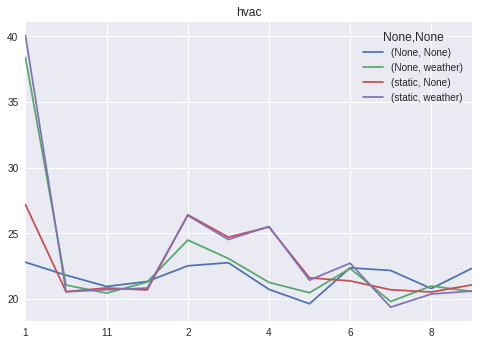

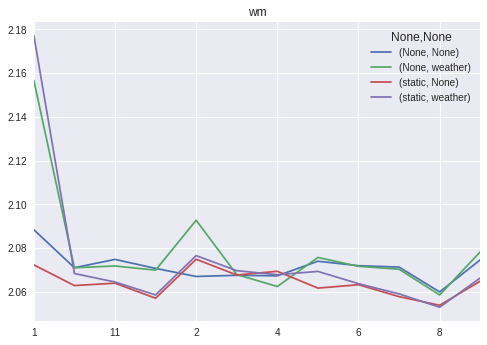

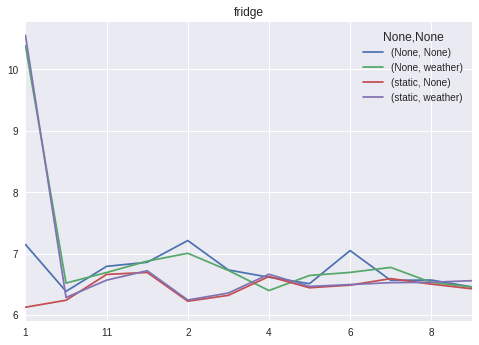

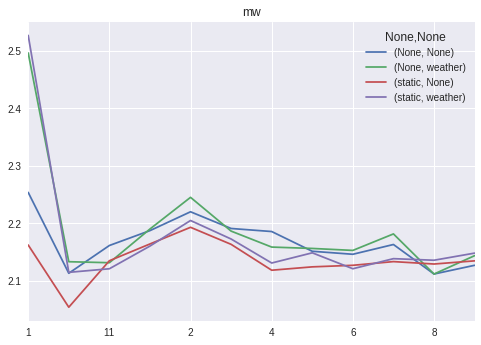

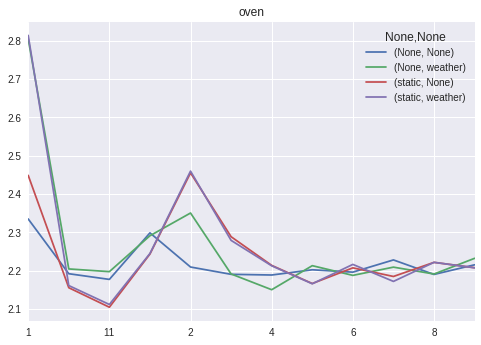

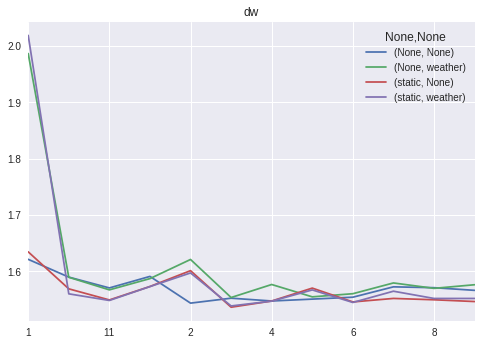

In [83]:
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance)

### MF one at a time

In [58]:
mf_results = {}
dataset = 'False'
sanity_num_points = {}
sensitivity = {}
for appliance in mf_p:
    mf_results[appliance] = {}
    sanity_num_points[appliance] = {}
    sensitivity[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        sensitivity[appliance][feature] = {}
        sanity_num_points[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}
#             sensitivity[appliance][feature][cost] = {}
#             sanity_num_points[appliance][feature][cost] = {}
            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    if appliance=="hvac":
                        pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                    alpha, beta, error, e  = compute_rmse_fraction(appliance, pred)
                    sensitivity[appliance][feature][lat] = error
                    sanity_num_points[appliance][feature][lat] = len(alpha)
                    if error < least_error:
                        least_error = error
                        best_k = lat
                        print best_k, least_error, appliance, feature, lat
                except Exception, e:
                    pass
            mf_results[appliance][feature][cost] = least_error

3 24.2750768797 hvac energy_static 3
5 22.2568491763 hvac energy_static 5
6 18.4052952589 hvac energy_static 6
9 16.3624346499 hvac energy_static 9
1 21.0137981143 hvac energy 1
6 15.5537522602 hvac energy 6
9 14.6366471475 hvac energy 9
3 2.05458269695 wm energy_static 3
1 2.06764762185 wm energy 1
3 5.55413600412 fridge energy_static 3
1 6.72078263163 fridge energy 1
3 6.64965459058 fridge energy 3
9 6.29637326182 fridge energy 9
3 2.08323730801 mw energy_static 3
4 2.03510749849 mw energy_static 4
1 2.18525331152 mw energy 1
2 2.15428496362 mw energy 2
4 2.13701486468 mw energy 4
6 2.12359275414 mw energy 6
7 2.0949081845 mw energy 7
9 2.08572959583 mw energy 9
3 2.23462090599 oven energy_static 3
4 2.151890912 oven energy_static 4
6 2.1345142992 oven energy_static 6
7 2.13391974788 oven energy_static 7
9 2.10649569655 oven energy_static 9
1 2.1907752562 oven energy 1
4 2.13612201908 oven energy 4
6 2.12004551246 oven energy 6
7 2.10440304634 oven energy 7
3 1.55374220117 dw energy_

In [59]:
mf_results

{'dw': {'energy': {'absolute': 1.5273333508519735},
  'energy_static': {'absolute': 1.5281926210671648}},
 'fridge': {'energy': {'absolute': 6.296373261824546},
  'energy_static': {'absolute': 5.5541360041241683}},
 'hvac': {'energy': {'absolute': 14.636647147465634},
  'energy_static': {'absolute': 16.362434649878494}},
 'mw': {'energy': {'absolute': 2.0857295958284148},
  'energy_static': {'absolute': 2.0351074984910009}},
 'oven': {'energy': {'absolute': 2.1044030463371004},
  'energy_static': {'absolute': 2.1064956965465274}},
 'wm': {'energy': {'absolute': 2.0676476218514237},
  'energy_static': {'absolute': 2.0545826969514183}}}

In [60]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
energy_static,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


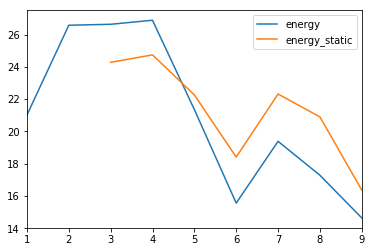

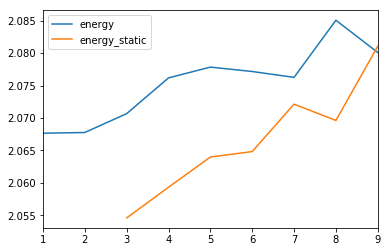

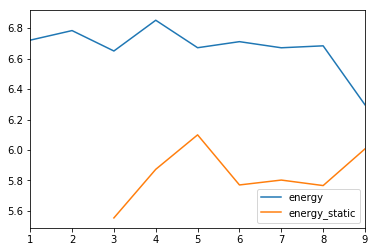

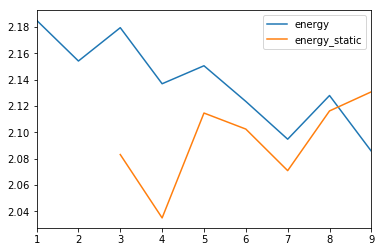

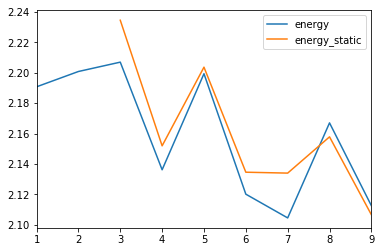

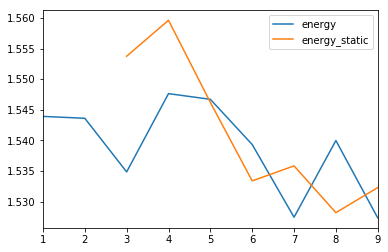

In [61]:
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot()

### MF all

In [40]:
mf_all_results = {}
sensitivity = {}
sanity_num_points = {}

dataset = 'False'
cost = 'absolute'
for appliance in mf_p:
    mf_all_results[appliance] = {}
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    
    for feature in ['energy_static','energy']:
        mf_all_results[appliance][feature] = {}
        sensitivity[appliance][feature] = {}
        sanity_num_points[appliance][feature] = {}
        
        
        least_error = 1000
        for lat in [str(x) for x in range(1, 10)]:
            try:
                pred = mf_all_p[appliance][feature][cost][dataset][lat]
                if appliance=="hvac":
                    pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                alpha, beta, error, e  = compute_rmse_fraction(appliance, pred)
                sensitivity[appliance][feature][lat] = error
                sanity_num_points[appliance][feature][lat] = len(alpha)
                
                if error < least_error:
                    least_error = error
                    best_k = lat
                    print best_k, least_error, appliance, lat, feature
            except:
                pass
        mf_all_results[appliance][feature] = least_error

3 25.027608696 hvac 3 energy_static
5 21.6757380378 hvac 5 energy_static
1 23.9223495069 hvac 1 energy
2 22.0065453383 hvac 2 energy
3 13.9984446797 wm 3 energy_static
4 12.48498445 wm 4 energy_static
7 11.6261026091 wm 7 energy_static
8 10.6007688578 wm 8 energy_static
1 11.9513882583 wm 1 energy
3 11.7308492405 wm 3 energy
4 11.4934169648 wm 4 energy
5 10.5865933622 wm 5 energy
3 5.79881231612 fridge 3 energy_static
1 6.6591969046 fridge 1 energy
6 6.58364642099 fridge 6 energy
3 2.13233602243 mw 3 energy_static
5 2.12431182967 mw 5 energy_static
7 2.09712948833 mw 7 energy_static
8 2.0872875025 mw 8 energy_static
1 2.18055097198 mw 1 energy
2 2.14518184716 mw 2 energy
6 2.13934873293 mw 6 energy
3 2.22891822588 oven 3 energy_static
4 2.20136321737 oven 4 energy_static
5 2.19547540202 oven 5 energy_static
6 2.18859001452 oven 6 energy_static
8 2.18818836448 oven 8 energy_static
1 2.21590555257 oven 1 energy
2 2.20396218673 oven 2 energy
3 2.18753886271 oven 3 energy
4 2.16543867073 o

In [44]:
pd.DataFrame(mf_all_results)

,dw,fridge,hvac,mw,oven,wm
energy,1.543473,6.583646,22.006545,2.139349,2.165439,10.586593
energy_static,1.527182,5.798812,21.675738,2.087288,2.188188,10.600769


In [42]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0
energy_static,3412.0,3744.0,2364.0,2430.0,1200.0,2452.0


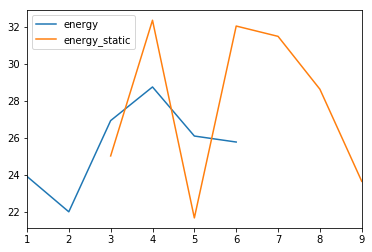

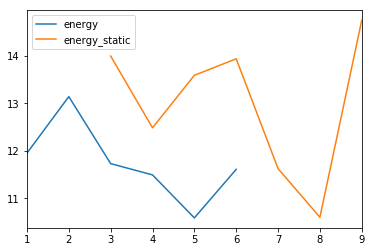

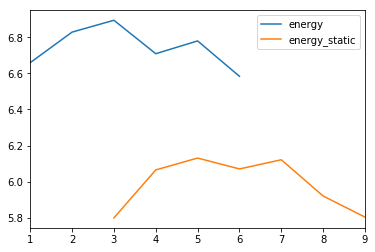

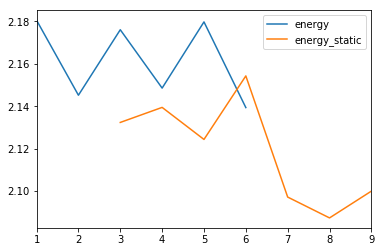

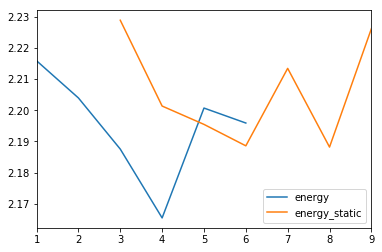

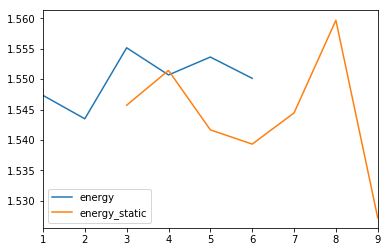

In [45]:
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot()

In [46]:
out = {}
for static in ['None','static']:
    for weather in ['None','weather']:
        out[(static, weather)] =  {}
        for lat in range(1, 13):
            out[(static, weather)][lat] =  compute_rmse_fraction('hvac',tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)])[2]

In [47]:
%matplotlib inline

In [48]:
pd.DataFrame(out)

None                static           
         None    weather       None    weather
1   22.801893  38.393245  27.189412  40.078872
2   22.528509  24.488210  26.418941  26.361275
3   22.765929  23.087780  24.708426  24.531925
4   20.737126  21.267391  25.485885  25.524858
5   19.636608  20.477520  21.609537  21.439134
6   22.373146  22.331163  21.379563  22.728421
7   22.174592  19.810035  20.704749  19.375324
8   20.797248  20.992323  20.532755  20.381277
9   22.331968  20.574519  21.072033  20.604072
10  21.815156  21.061156  20.559662  20.550647
11  20.957437  20.446916  20.841890  20.706951
12  21.334217  21.293993  20.687999  20.832385

In [49]:
case_2 = {}

for static in ['None','static']:
    for weather in ['None','weather']:
        case_2[(static, weather)] =  {}
        for appliance in mf_p.keys():
            max_error = 1e6
            for lat in range(1, 13):
                if appliance=='hvac':
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)][range(4, 10)]
                else:
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)]
                error = compute_rmse_fraction(appliance,pred)[2]
                if error<max_error:
                    max_error=error
                    case_2[(static, weather)][appliance]=max_error
                    print appliance, static, weather, max_error
                    

hvac None None 22.8018929924
hvac None None 22.5285088378
hvac None None 20.7371260677
hvac None None 19.6366083239
wm None None 2.08838718556
wm None None 2.06703525578
wm None None 2.05997093002
fridge None None 7.14776545928
fridge None None 6.73275961606
fridge None None 6.61361099452
fridge None None 6.50938869175
fridge None None 6.45607291199
fridge None None 6.38416993795
mw None None 2.25371701353
mw None None 2.21996570922
mw None None 2.19087635179
mw None None 2.18556929506
mw None None 2.15119192669
mw None None 2.14597974727
mw None None 2.11159037645
oven None None 2.33475215786
oven None None 2.20934964648
oven None None 2.19031506253
oven None None 2.18851711032
oven None None 2.17707508288
dw None None 1.62137137301
dw None None 1.54363711667
hvac None weather 38.3932445793
hvac None weather 24.488209853
hvac None weather 23.0877800831
hvac None weather 21.2673905637
hvac None weather 20.4775199132
hvac None weather 19.8100351778
wm None weather 2.15664341739
wm None 

In [62]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [63]:
pd.DataFrame(mf_relative)

""


In [65]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,1.527333,6.296373,14.636647,2.085730,2.104403,2.067648
energy_static,1.528193,5.554136,16.362435,2.035107,2.106496,2.054583


In [84]:
results_df ={}
results_df[('MF-1-at-a-time','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF-1-at-a-time','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

results_df[('MF-all-appliances','Energy')] = pd.DataFrame(mf_all_results).ix['energy']
results_df[('MF-all-appliances','Energy+Static')] = pd.DataFrame(mf_all_results).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in [1, 2, 3, 4]:
#     results_df[('TF-1-at-a-time-'+str(case),'Energy')] = pd.DataFrame(tf_custom['abs']).ix[str(case)]
    results_df[('TF-1-at-a-time-'+str(case),'Energy')] = pd.DataFrame(tf_custom).ix[str(case)]

    results_df[('TF-all-appliances-'+str(case),'Energy')] = pd.DataFrame(tf_custom_all).ix[str(case)]
del results_df[('TF-all-appliances-'+str(2),'Energy')]
results_df[('TF-all-appliances-'+str(2),'Energy')] = pd.DataFrame(case_2)[('None','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static')] = pd.DataFrame(case_2)[('static','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Weather')] = pd.DataFrame(case_2)[('None','weather')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static+Weather')] = pd.DataFrame(case_2)[('static','weather')]



#for case in range(1, 5):
#    results_df[('TF-Custom-'+str(case)+" (Rel)",'Energy')] = pd.DataFrame(tf_custom_rel).ix[case]

#results_df[('TF-Custom-'+str(4)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_parafac_static)
#results_df[('TF-Custom-'+str(4)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_parafac_static_rel)

#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_static_abs)
#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_2_static_rel)


#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['None'] for appliance in mf_p})
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['None']['weather'] for appliance in mf_p})
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['weather'] for appliance in mf_p})







In [86]:
pd.DataFrame(results_df)

KNN               MF-1-at-a-time                \
           Energy Energy+Static         Energy Energy+Static   
aggregate     NaN           NaN            NaN           NaN   
dw          1.893         1.857          1.527         1.528   
fridge      4.980         4.944          6.296         5.554   
hvac       41.003        33.872         14.637        16.362   
mw          1.976         1.971          2.086         2.035   
oven        2.010         2.074          2.104         2.106   
wm          2.094         2.068          2.068         2.055   

          MF-all-appliances               TF-1-at-a-time-1 TF-1-at-a-time-2  \
                     Energy Energy+Static           Energy           Energy   
aggregate               NaN           NaN              NaN              NaN   
dw                    1.543         1.527            1.846            1.929   
fridge                6.584         5.799            6.054            6.672   
hvac                 22.007        21.676           47.497           46.512   
mw                    2.139         2.087            1.906            2.140   
oven                  2.165         2.188            2.231            2.381   
wm                   10.587        10.601            2.060            2.084   

          TF-1-at-a-time-3 TF-1-at-a-time-4 TF-all-appliances-1  \
                    Energy           Energy              Energy   
aggregate              NaN              NaN              18.536   
dw                   1.884            1.871               1.533   
fridge               5.972            5.987               6.949   
hvac                49.013           45.647              21.445   
mw                   1.933            1.945               2.169   
oven                 2.279            2.200               2.077   
wm                   2.064            2.065               2.065   

          TF-all-appliances-2                                      \
                       Energy Energy+Static Energy+Static+Weather   
aggregate                 NaN           NaN                   NaN   
dw                      1.544         1.536                 1.539   
fridge                  6.384         6.126                 6.243   
hvac                   19.637        20.533                19.375   
mw                      2.112         2.054                 2.115   
oven                    2.177         2.105                 2.112   
wm                      2.060         2.054                 2.053   

                         TF-all-appliances-3 TF-all-appliances-4  
          Energy+Weather              Energy              Energy  
aggregate            NaN               9.488              19.331  
dw                 1.554               1.612               1.537  
fridge             6.397               6.465               6.036  
hvac              19.810              20.850              19.211  
mw                 2.112               2.134               2.058  
oven               2.150               2.183               2.113  
wm                 2.059               2.078               2.054

In [87]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [88]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


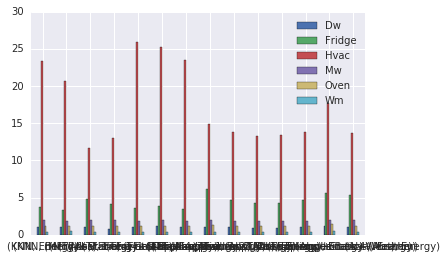

In [76]:
%matplotlib inline
out.plot(kind="bar",rot=0)

In [50]:
appliance='hvac'
pred = knn_p[appliance][feature][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

NameError: name 'neighbours' is not defined

In [ ]:
print neighbours
pred = mf_p[appliance][feature]['relative'][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

In [ ]:
e[e>50]

In [ ]:
pred.ix[7641]

In [ ]:
gt_f.ix[7641]

In [ ]:
pred_f[pred_f>60].unstack().dropna()

In [ ]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut
from scipy.optimize import nnls

import pickle
from tensor_custom_core import *


APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "Austin"
year = 2014

def un_normalize(x, maximum, minimum):
    return (maximum-minimum)*x + minimum


a, b = 3, 3

print a, b


pred = {}
for appliance in APPLIANCES[:1]:
    pred[appliance] = {}
    if appliance == "hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    months = stop - start
    pred[appliance] = {}
    appliance_df = create_matrix_all_entries(region, year, appliance)
    aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    energy_cols = np.concatenate([aggregate_cols, appliance_cols])

    df = appliance_df.copy()

In [ ]:
df.columns[-3:]

In [ ]:
static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())

In [ ]:
static_df

In [ ]:
weather_df = np.ones(len(static_df)).reshape(-1, 1)

In [ ]:
weather_df